<a href="https://colab.research.google.com/github/JianchaoSun/learning_machine_learning/blob/master/EarlyStop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
#import matplot as plt
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#reshape picture from 2*2 to vector
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float')/255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [9]:
from tensorflow.python import keras
import numpy as np
from time import time

#add model check point to save best performance, and tensorboard
checkpoint = tf.keras.callbacks.ModelCheckpoint('Users\jianchaosun⁩\⁨Downloads⁩\savepoint\b1.h5', monitor='val_acc', verbose=1, save_best_only=True)
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs2/{}'.format(time()),write_graph=True, write_grads=True, write_images=True)
network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(256,activation = 'relu', input_shape = (28*28,)))
network.add(tf.keras.layers.Dense(512,activation = 'relu'))
network.add(tf.keras.layers.Dense(10,activation = 'softmax'))


network.compile(loss='categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(test_images[0].shape)
#define a early stop parameter 
early_stop = keras.callbacks.EarlyStopping(patience= 10, verbose=1)
early_stop
#network.fit(train_images, train_labels, batch_size = 128, epochs = 3, validation_data = (test_images, test_labels),callbacks=[ early_stop])
history = network.fit(train_images, train_labels, batch_size = 128, epochs = 6, validation_data = (test_images, test_labels), callbacks=[early_stop,checkpoint,tensorboard])

#tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

(784,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/6
59264/60000 [============================>.] - ETA: 0s - loss: 0.4952 - acc: 0.8227
Epoch 00001: val_acc improved from -inf to 0.85570, saving model to Users\jianchaosun⁩\⁨Downloads⁩\savepoint1.h5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.4936 - acc: 0.8232 - val_loss: 0.4017 - val_acc: 0.8557
Epoch 2/6
59520/60000 [============================>.] - ETA: 0s - loss: 0.3568 - acc: 0.8716
Epoch 00002: val_acc improved from 0.85570 to 0.86790, saving model to Users\jianchaosun⁩\⁨Downloads⁩\savepoint1.h5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3565 - acc: 0.8719 - val_loss: 0.3788 - val_acc: 0.8679
Epoch 3/6
59520/60000 [============================>.] - ETA: 0s - loss: 0.3220 - acc: 0.8812
Epoch 00003: val_acc did not improve from 0.86790
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3218 - acc: 0.8813 - val_loss: 0.3666 - val_acc: 0.8

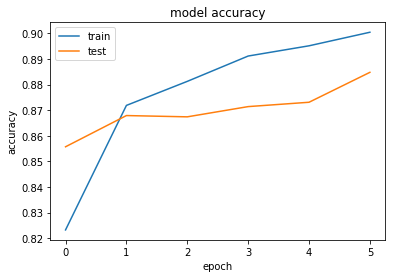

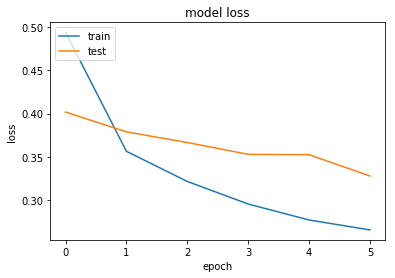

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()